In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import pandas as pd

In [2]:
# Definindo o ambiente do labirinto
maze = np.array([
    [0, 1, 0, 0, 0],
    [0, 1, 1, 1, 0],
    [0, 0, 1, 0, 0],
    [0, 1, 1, 1, 0],
    [0, 0, 0, 0, 2]
])

In [3]:
# Parâmetros
n_actions = 4
epsilon = 0.3  # Probabilidade de explorar (0.3 = 30% de chance)
gamma = 0.9  # Fator de desconto para recompensas futuras

In [4]:
# Inicialização dos valores estimados de ação (Q-values) com zeros
q_values = np.zeros((maze.shape[0], maze.shape[1], n_actions))

In [5]:
# Função para escolher uma ação com base na política epsilon-gananciosa
def epsilon_greedy_policy(q_values, epsilon, state):
    if np.random.rand() < epsilon:
        # Ação aleatória (exploração)
        return np.random.choice(n_actions)
    else:
        # Ação gananciosa (exploração)
        return np.argmax(q_values[state[0], state[1]])

In [6]:
# Função para mover o agente no ambiente
def move(state, action):
    if action == 0:
        new_state = (state[0] - 1, state[1])  # Mover para cima
    elif action == 1:
        new_state = (state[0] + 1, state[1])  # Mover para baixo
    elif action == 2:
        new_state = (state[0], state[1] - 1)  # Mover para a esquerda
    else:
        new_state = (state[0], state[1] + 1)  # Mover para a direita

    # Verificar se o movimento é válido (dentro do labirinto e não em uma parede)
    if (0 <= new_state[0] < maze.shape[0] and
        0 <= new_state[1] < maze.shape[1] and
        maze[new_state] != 1):
        return new_state
    else:
        return state

In [7]:
# Função para criar um DataFrame a partir dos valores Q
def create_q_table(q_values):
    rows, cols, _ = q_values.shape
    q_table = pd.DataFrame(np.zeros((rows, cols), dtype=int), columns=[str(i) for i in range(cols)])

    for row in range(rows):
        for col in range(cols):
            q_table.iloc[row, col] = np.argmax(q_values[row, col])

    return q_table

Época 1:
Estado anterior: (0, 0)
Ação tomada pelo agente: 1
Estado atual: (1, 0)
Recompensa: -0.1

Época 1:
Estado anterior: (1, 0)
Ação tomada pelo agente: 1
Estado atual: (2, 0)
Recompensa: -0.1

Época 1:
Estado anterior: (2, 0)
Ação tomada pelo agente: 3
Estado atual: (2, 1)
Recompensa: -0.1

Época 1:
Estado anterior: (2, 1)
Ação tomada pelo agente: 2
Estado atual: (2, 0)
Recompensa: -0.1

Época 1:
Estado anterior: (2, 0)
Ação tomada pelo agente: 1
Estado atual: (3, 0)
Recompensa: -0.1

Época 1:
Estado anterior: (3, 0)
Ação tomada pelo agente: 0
Estado atual: (2, 0)
Recompensa: -0.1

Época 1:
Estado anterior: (2, 0)
Ação tomada pelo agente: 1
Estado atual: (3, 0)
Recompensa: -0.1

Época 1:
Estado anterior: (3, 0)
Ação tomada pelo agente: 1
Estado atual: (4, 0)
Recompensa: -0.1

Época 1:
Estado anterior: (4, 0)
Ação tomada pelo agente: 3
Estado atual: (4, 1)
Recompensa: -0.1

Época 1:
Estado anterior: (4, 1)
Ação tomada pelo agente: 3
Estado atual: (4, 2)
Recompensa: -0.1

Época 1:
E

c:\Users\ersju\Envs\fiap\Lib\site-packages\matplotlib\animation.py:892: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


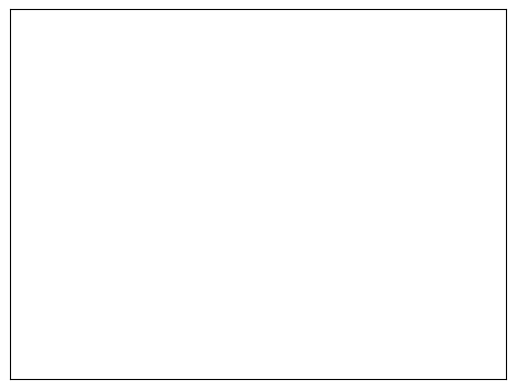

[   0  1  2  3  4
0  1  0  0  0  0
1  1  0  0  0  0
2  1  2  0  0  0
3  1  0  0  0  0
4  3  3  3  3  0,    0  1  2  3  4
0  1  0  0  0  0
1  1  0  0  0  0
2  1  2  0  0  0
3  1  0  0  0  0
4  3  3  3  3  0,    0  1  2  3  4
0  1  0  0  0  0
1  1  0  0  0  0
2  1  2  0  0  0
3  1  0  0  0  0
4  3  3  3  3  0,    0  1  2  3  4
0  1  0  0  0  0
1  1  0  0  0  0
2  1  2  0  0  0
3  1  0  0  0  0
4  3  3  3  3  0,    0  1  2  3  4
0  1  0  0  0  0
1  1  0  0  0  0
2  1  2  0  0  0
3  1  0  0  0  0
4  3  3  3  3  0,    0  1  2  3  4
0  1  0  0  0  0
1  1  0  0  0  0
2  1  2  0  0  0
3  1  0  0  0  0
4  3  3  3  3  0,    0  1  2  3  4
0  1  0  0  0  0
1  1  0  0  0  0
2  1  2  0  0  0
3  1  0  0  0  0
4  3  3  3  3  0,    0  1  2  3  4
0  1  0  0  0  0
1  1  0  0  0  0
2  1  2  0  0  0
3  1  0  0  0  0
4  3  3  3  3  0,    0  1  2  3  4
0  1  0  0  0  0
1  1  0  0  0  0
2  1  2  0  0  0
3  1  0  0  0  0
4  3  3  3  3  0,    0  1  2  3  4
0  1  0  0  0  0
1  1  0  0  0  0
2  1  2  0  0  0
3  1

In [13]:
# Função para atualizar o gráfico da animação
def update(frame):
    ax.cla()
    ax.matshow(maze, cmap=plt.cm.Pastel1)

    if frame < len(path):
        state = path[frame]
        ax.plot(state[1], state[0], 'bo', markersize=15, label="Agente")
        ax.set_title(f"Época {frame + 1}")

# Simulação de episódios
n_episodes = 1000
path = []

q_tables = []  # Lista para armazenar as tabelas Q após cada época

for episode in range(n_episodes):
    state = (0, 0)  # Iniciar no canto superior esquerdo do labirinto
    done = False

    while not done:
        action = epsilon_greedy_policy(q_values, epsilon, state)
        new_state = move(state, action)

        if maze[new_state] == 2:
            reward = 1  # Ganhou, encontrou o objetivo
            done = True
        elif maze[new_state] == 1:
            reward = -1  # Bateu em uma parede
        else:
            reward = -0.1  # Outras ações custam um pouco de recompensa negativa

        # Atualizar os valores Q usando a fórmula de aprendizado por reforço Q-learning
        q_values[state[0], state[1], action] += 0.1 * (reward + gamma * np.max(q_values[new_state[0], new_state[1]]) - q_values[state[0], state[1], action])

        print(f"Época {episode + 1}:")
        print(f"Estado anterior: {state}")
        print(f"Ação tomada pelo agente: {action}")
        print(f"Estado atual: {new_state}")
        print(f"Recompensa: {reward}\n")

        state = new_state
        path.append(state)  # Adiciona o estado à lista de posições do agente

        q_tables.append(create_q_table(q_values))  # Adiciona a tabela Q atual à lista

# Preparando a representação gráfica do labirinto
fig, ax = plt.subplots()

# Configurações de plotagem
ax.set_xticks([])
ax.set_yticks([])

# Criando a animação
ani = FuncAnimation(fig, update, frames=len(path), repeat=False)
plt.show()

print(q_tables)